In [1]:
%pip install -qq InstructorEmbedding chromadb
%env TOKENIZERS_PARALLELISM=false

Note: you may need to restart the kernel to use updated packages.
env: TOKENIZERS_PARALLELISM=false


In [2]:
from InstructorEmbedding import INSTRUCTOR

model = INSTRUCTOR("hkunlp/instructor-base")
model.__call__ = model.encode

/Users/yujonglee/dev/fastrepl/.venv/lib/python3.11/site-packages/InstructorEmbedding/instructor.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange


load INSTRUCTOR_Transformer
max_seq_length  512


In [3]:
from fastrepl.polish import Updatable


# TODO: Read instruct embedding paper
def embed(sentence: str):
    instruction = Updatable(
        key="instruction",
        value="Represent the Science title:",
    ).value

    return model.encode([[instruction, sentence]])

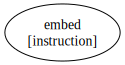

In [4]:
from IPython.display import display
from fastrepl import Analyze

with Analyze() as ctr:
    embed("")
    display(ctr.build_graph(GRAPH=2))

In [5]:
from fastrepl import REPL
from fastrepl.eval.metric import load_metric


metrics = [
    # TODO: how to eval? MRR and mAP is the way?
    # I should look at my notes when I get back to home
    # load_metric("mrr"),
    # load_metric("map"),
]

with REPL() as ctr:
    embed("")

In [6]:
import chromadb

setting = chromadb.get_settings()
setting.allow_reset = True

client = chromadb.PersistentClient(path="./", settings=setting)
client.reset()

collection = client.create_collection(name="docs", embedding_function=model)

In [7]:
import numpy as np
from sklearn.decomposition import PCA